<a href="https://colab.research.google.com/github/okada-t-rafael/time_series_data_analysis/blob/master/40_Statsmodel_Introduction_To_Statsmodels_Library_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

In [3]:
from google.colab import files
files.upload()

Saving macrodata.csv to macrodata.csv


{'macrodata.csv': b',year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint\n3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0,0\n6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.83,2.34,0.74\n9/30/1959,1959,3,2775.488,1751.8,289.226,491.26,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09\n12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140,4.33,5.6,179.386,0.27,4.06\n3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.5,5.2,180.007,2.31,1.19\n6/30/1960,1960,2,2834.39,1792.9,298.152,460.4,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55\n9/30/1960,1960,3,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.7,-0.34\n12/31/1960,1960,4,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08\n3/31/1961,1961,1,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.4,2.77\n6/30/1961,1961,2,2872.005,1814.3

In [5]:
df = pd.read_csv('macrodata.csv', index_col=0, parse_dates=True)

In [6]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


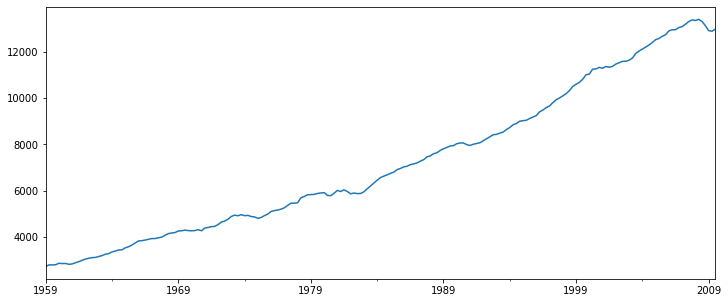

In [8]:
df['realgdp'].plot(figsize=(12, 5))

In [11]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [12]:
type(gdp_trend)

pandas.core.series.Series

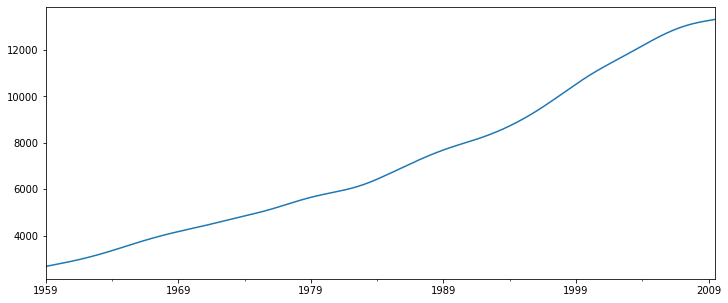

In [16]:
gdp_trend.plot(figsize=(12, 5))

In [14]:
df['trend'] = gdp_trend

In [15]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


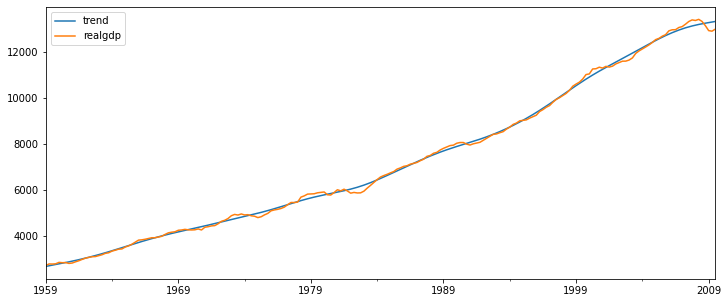

In [18]:
df[['trend', 'realgdp']].plot(figsize=(12, 5))

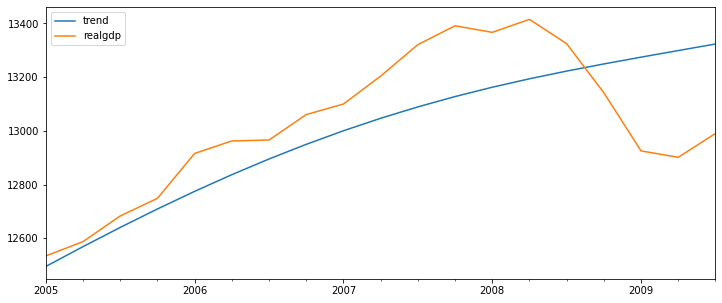

In [19]:
df[['trend', 'realgdp']]['2005-01-01':].plot(figsize=(12, 5))